<a href="https://colab.research.google.com/github/zzaeyun/ESAA22-2/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_377to395.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **06 차원 축소**


---

## **01 차원 축소(Dimension Reduction) 개요**

**차원 축소**
- PCA
- LDA
- SVD
- NMF

- 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성
---


**차원을 축소해야 하는 이유**
- 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지고, 희소(sparse)한 구조를 가지게 됨
- 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐
- 또한 피처가 많을 경우 개별 피처 간에 상관관계가 높을 가능성이 큼
- 선형 회귀와 같은 선형 모델에서는 입력 변수간의 상관관계가 높을 경우 이로 인한 다중 공선성 문제로 모델의 예측 성능이 저하


---

- 매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석
- 수십 개 이상의 피처가 있는 데이터의 경우 이를 시각적으로 표현해 데이터의 특성을 파악하기는 불가능
- 3차원 이하의 차원 축소를 통해 시각적으로 데이터를 압축해서 표현할 수 있음


---

**차원 축소의 의미**
- 피처 선택 feature selection: 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것
- 피처 추출 feature extraction: 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것, 새롭게 추출된 중요 특성은 기존 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값
  - 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것
  - 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소(Latent Factor)를 추출하는 것을 의미
- 매우 많은 차원을 가지고 있는 이미지나 텍스트에서 차원 축소를 통해 잠재적인 의미를 찾아 주는 데 이 알고리즘이 잘 활용 됨

---

**차원 축소 활용**
- 이미지 데이터
  - 매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행
  - 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이기 때문에 이미지 분류 등의 분류 수행 시에 과적합 overfitting 영향력이 작아져서 오히려 원본 데이터로 예측하는 것보다 예측 성능을 더 끌어 올릴 수 있음
  
- 텍스트 
  - 텍스트 문서의 숨겨진 의미를 추출
  - 문서는 많은 단어로 구서오디어 있으며 문서를 만드는 사람은 어떤 의미나 의도를 가지고 문서를 작성하면서 단어를 사용하게 됨
  - 차원 축소 알고리즘은 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱 Semantic 의미나 토픽 Topic 을 잠재 요소로 간주하고 이를 찾아낼 수 있음

  

## **02 PCA(Principal Component Analysis)**

**PCA 개요**

대표적인 차원 축소 기법이므로, 여러 변수간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되는 것이 당연
- 이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA 의 주성분이 됨


ex) 2개의 피처를 한 개의 주성분을 가진 데이터 세트로 차원 축소를 할 수 있음
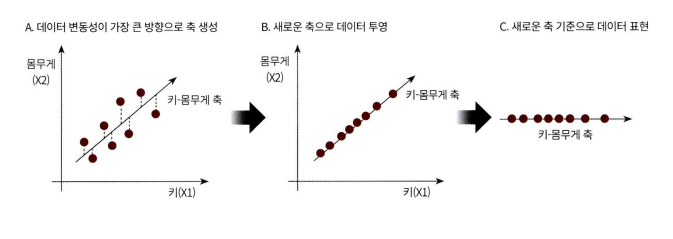

**데이터 변동성 (Variance)을 기반으로 첫 번째 벡터 축을 생성**

**이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 두 번째 벡터 축을 생성**

이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원을 원본 데이터가 차원 축소 됨


---

**선형 대수 관점에서 해석**
입력 데이터의 공분산 행렬을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것
- 이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냅니다. 고윳값(eigenvalue)은 바로 이 고유 벡터의 크기를 나타냄
- 동시에 입력 데이터의 분산을 나타냄


---

- **고유벡터**: 핵렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭
- **공분산 행렬**: 정방행렬이며, 대칭행렬



---

**PCA 수행 스텝**
1. 입력 데이터 세트의 공분산 행렬을 생성
2. 공분산 행렬의 고유 벡터와 고유값을 게산
3. 고유값이 가장 큰 순으로 K개 (PCA 변환 차수만큼)만큼 고유벡터를 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력한 데이터를 변환



붓꽃 iris 데이터 세트
- sepal length, sepal width, petal length, petal width
- 4개의 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()

columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0

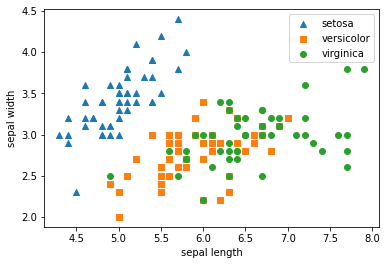

In [2]:
#분포를 2차원으로 시각화

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^','s','o']

for i, marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [3]:
#2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화
from sklearn.preprocessing import StandardScaler

#Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 정규 분포를 가지는 갑들로 변환
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])

**사이킷런의 PCA클래스**
- n_components: PCA로 변환할 차원의 수를 의미

In [4]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

pca_component_1  pca_component_2  target
0        -2.264703         0.480027       0
1        -2.080961        -0.674134       0
2        -2.364229        -0.341908       0

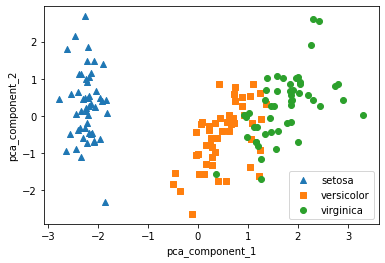

In [6]:
markers=['^','s','o']

for i, marker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

PCA로 변환 후에도 pca_component_1 축을 기반으로 Setosa 품종을 명확하게 구분가능, 나머지 두 품종도 비교적 잘 구분


---
PCA 객체의 **explained_variance_ratio_** 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공


In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


PCA 첫번째 변환 요소인 pca_component_1이 전체 변동성의 약 72.9%를 차지하며, 두 번째인 pca_component_2가 약 22.8%를 차지

---

원본 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과를 비교

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [9]:
#랜덤 포레스트 적용
pca_X=irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca=cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


좀 더 많은 피처를 가진 데이터 세트를 적은 PCA 컴포넌트 기반을 변환한 뒤 예측 영향도가 어떻게 되는지 변환된 PCA 데이터 세트에 기반해서 비교

In [10]:
#이거 설치하고 런타임 다시 시작하면 해결 되는 것 같음
#!pip install --upgrade openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd

df=pd.read_excel('/credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  

[3 rows x 24 columns]

In [12]:
#칼럼명 변경 및 피처 데이터 생성
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'},inplace=True)
y_target=df['default']
X_features=df.drop('default', axis=1)

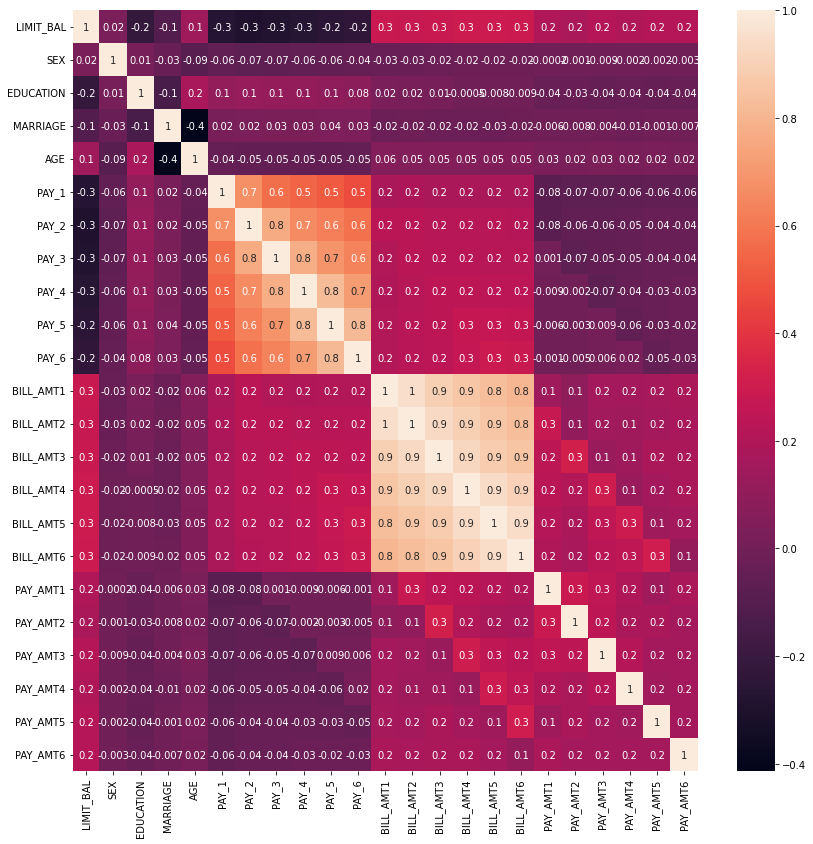

In [13]:
#상관도를 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

BILL~ 6개의 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음을 알 수 있음


---

배별 컴포넌트의 변동성 알아보기

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill=['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component 별 변동성:', pca.explained_variance_ratio_)


대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component 별 변동성: [0.90555253 0.0509867 ]


단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명 할 수 있음

---

원본과 PCA 변환 데이터 세트 분류 예측 결과를 상호 비교

In [19]:
from pandas.core.common import random_state
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300, random_state=156)
scores=cross_val_score(rcf, X_features, y_target, scoring='accuracy',cv=3)

print('CV=3 인 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)

pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7899 0.7969 0.8025]
PCA 변환 데이터 세트 평균 정확도: 0.7964


##**LDA(Linear Discriminant Analysis)**

###**LDA 개요**
LDA: 선형 판별 분석법
- 입력 데이터 세트를 저차원 공간에 투영해 차원 축소
- 지도학습의 분류에서 사용하기 쉽도록 개별 크래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소
- PCA: 입력 데이터의 변동성의 가장 큰 축
- LDA: 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축

- LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소

---

- 일반적으로 LDA를 구하는 스텝은 공분산 행렬이 아니라 위에 설명한 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영
1. 클래스 내부와 클래스 간 분산 행렬을 구함, 이는 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구함
2. 클래스 내부 분산 행렬을 Sw 클래스 간 분산 행렬을 Sb라고 하면 다음 시긍로 두 행렬의 고유 벡터로 분해 가능


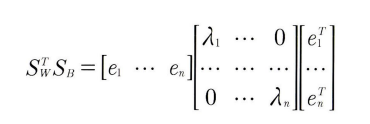

3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환


---

### **붓꽃 데이터 세트에 LDA 적용하기**



In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

**LDA는 지도학습**

In [25]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


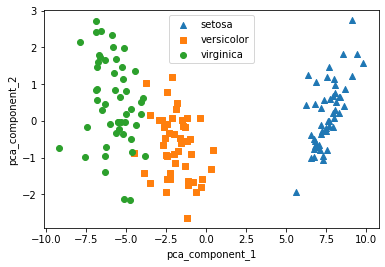

In [26]:
#2차원 평면에 품종별로 표현

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1', 'lda_component_2']
irisDF_lda=pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

makers=['^','s','o']

for i, marker in enumerate(markers):
  x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()